In [3]:
#library
import pandas as pd
import numpy as np
import itertools
import seaborn as sns

<H1>Dataset : Pima Indians Diabetes

In [4]:
df = pd.read_csv("dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h1>Features

In [5]:
features = df.columns.tolist()[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
X = df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
label = [col for col in df.columns if col == 'Outcome']
label

['Outcome']

In [8]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
num_feats = X.shape[1]
num_feats

8

<AxesSubplot:>

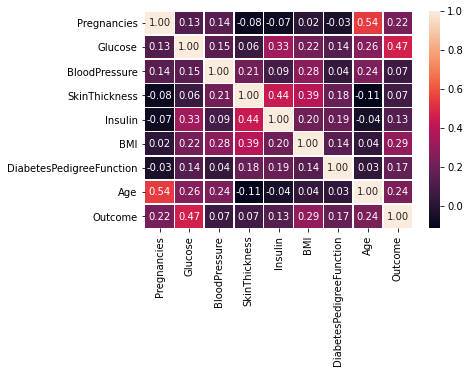

In [10]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.corr()['Outcome']['BloodPressure']

0.06506835955033277

In [13]:
np.corrcoef(X['BloodPressure'],y)

array([[1.        , 0.06506836],
       [0.06506836, 1.        ]])

In [14]:
def grouping_attribute_score(attrubutes, value):
    '''combine value to dictionary format'''
    return {"attributes": attrubutes, "value": value}

In [15]:
def find_best_subset(subset_score):
    """find best score of subset"""
    #still available for only a group of attributes
    print('========================================== find max value ===================================')
    best_subset_score = []
    current_best_score_index = (0,0)
    for subset in subset_score:
#         print('index: ', subset_score.index(subset))
#         print('current best score:', current_best_score_index[0])
#         print('current subset score', subset['value'])
        if subset['value'] > current_best_score_index[0]:
#             print('new max score')
            current_best_score_index = (subset['value'],(subset_score.index(subset)))
#             print(current_best_score_index)

    best_subset_score.append(subset_score[current_best_score_index[1]])
    print(best_subset_score)
    print("=============================================================================================")
    return best_subset_score
# return [{'attrubute': ('Glucose', 'BMI'), 'value': 0.3796380304756596}]

In [16]:
def cal_best(algo_round):
    '''match all subset and find the best one'''
    #start calculating
    subset_score = []
    subset_mean = []
    
    #use mean of all correlation of subset
    for atrs in algo_round:
        temp_score_mean = []
        for i in atrs:
            cor = np.corrcoef(X[i], y)[0, 1]
            temp_score_mean.append(cor)
        subset_mean.append(np.mean(temp_score_mean)) #score
        
    for atrs,mean_score in zip(algo_round,subset_mean):
        subset_score.append(grouping_attribute_score(atrs, mean_score))
    [print(i) for i in subset_score]
    return find_best_subset(subset_score=subset_score)

<h1>SFS

In [17]:
best_subset_per_round = []
for num in range(2, num_feats+1):
    print("========================================== Subset_Score Round", num-1,'=============================')
    if num == 2: #1st round
        sfs_round = list(itertools.combinations(X, num))

        print()        
        best_subset_per_round.append(cal_best(algo_round=sfs_round))
        print()
        
    else: #other round
        sfs_round = list(itertools.combinations(X, num))
        
        #hv to pop non best_subset out
        sfs_round_temp = []
        for i in range(len(sfs_round)):
            if all(attr in sfs_round[i] for attr in best_subset_per_round[num-3][0]['attributes']):
                sfs_round_temp.append(sfs_round[i])
        sfs_round = sfs_round_temp
        
        print()
        best_subset_per_round.append(cal_best(algo_round=sfs_round))
        print()       
        
print()
print('best_subset_per_round :',"\n", '=============== SubsetRanking ===============')
# [print(i) for i in best_subset_per_round]

best_temp = [i[0] for i in best_subset_per_round]
best_subset_per_round = best_temp
best_subset_per_round.sort(key=lambda x: x['value'], reverse=True)
best_subset_per_round

========================================== Subset_Score Round 1 =============================

{'attributes': ('Pregnancies', 'Glucose'), 'value': 0.34423977567043024}
{'attributes': ('Pregnancies', 'BloodPressure'), 'value': 0.14348325629215974}
{'attributes': ('Pregnancies', 'SkinThickness'), 'value': 0.14832519247615303}
{'attributes': ('Pregnancies', 'Insulin'), 'value': 0.17622305395901727}
{'attributes': ('Pregnancies', 'BMI'), 'value': 0.25729640783921603}
{'attributes': ('Pregnancies', 'DiabetesPedigreeFunction'), 'value': 0.19787110934347332}
{'attributes': ('Pregnancies', 'Age'), 'value': 0.2301270680305921}
{'attributes': ('Glucose', 'BloodPressure'), 'value': 0.2658248789286033}
{'attributes': ('Glucose', 'SkinThickness'), 'value': 0.2706668151125966}
{'attributes': ('Glucose', 'Insulin'), 'value': 0.2985646765954608}
{'attributes': ('Glucose', 'BMI'), 'value': 0.3796380304756596}
{'attributes': ('Glucose', 'DiabetesPedigreeFunction'), 'value': 0.32021273197991684}
{'attrib

[{'attributes': ('Glucose', 'BMI'), 'value': 0.3796380304756596},
 {'attributes': ('Glucose', 'BMI', 'Age'), 'value': 0.33254401465950556},
 {'attributes': ('Pregnancies', 'Glucose', 'BMI', 'Age'),
  'value': 0.30488254925312586},
 {'attributes': ('Pregnancies',
   'Glucose',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.27867485253309265},
 {'attributes': ('Pregnancies',
   'Glucose',
   'Insulin',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.25398703625825186},
 {'attributes': ('Pregnancies',
   'Glucose',
   'SkinThickness',
   'Insulin',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.2283820642096901},
 {'attributes': ('Pregnancies',
   'Glucose',
   'BloodPressure',
   'SkinThickness',
   'Insulin',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.20796785112727043}]

<h2> The Best Candidate Subset by SFS

In [18]:
find_best_subset(best_subset_per_round)

========================================== find max value ===================================
[{'attributes': ('Glucose', 'BMI'), 'value': 0.3796380304756596}]


[{'attributes': ('Glucose', 'BMI'), 'value': 0.3796380304756596}]